In [16]:
import sys

In [17]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Please append your own directory after ‘/content/drive/My Drive/'
# where you have nutil.py and adult_subsample.csv
### ========== TODO : START ========== ###
sys.path += ['/content/drive/My Drive/CSM146/HW1'] 
### ========== TODO : END ========== ###


In [19]:
from nutil import *

In [20]:
# Use only the provided packages!
import math
import csv

from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

In [21]:
######################################################################
# Immutatble classes
######################################################################

class Classifier(object) :
    """
    Classifier interface.
    """

    def fit(self, X, y):
        raise NotImplementedError()

    def predict(self, X):
        raise NotImplementedError()


class MajorityVoteClassifier(Classifier) :

    def __init__(self) :
        """
        A classifier that always predicts the majority class.

        Attributes
        --------------------
            prediction_ -- majority class
        """
        self.prediction_ = None

    def fit(self, X, y) :
        """
        Build a majority vote classifier from the training set (X, y).

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            y    -- numpy array of shape (n,), target classes

        Returns
        --------------------
            self -- an instance of self
        """
        majority_val = Counter(y).most_common(1)[0][0]
        self.prediction_ = majority_val
        return self

    def predict(self, X) :
        """
        Predict class values.

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples

        Returns
        --------------------
            y    -- numpy array of shape (n,), predicted classes
        """
        if self.prediction_ is None :
            raise Exception("Classifier not initialized. Perform a fit first.")

        n,d = X.shape
        y = [self.prediction_] * n
        return y



In [22]:
######################################################################
# Mutatble classes
######################################################################

class RandomClassifier(Classifier) :

    def __init__(self) :
        """
        A classifier that predicts according to the distribution of the classes.

        Attributes
        --------------------
            probabilities_ -- class distribution dict (key = class, val = probability of class)
        """
        self.probabilities_ = None

    def fit(self, X, y) :
        """
        Build a random classifier from the training set (X, y).

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            y    -- numpy array of shape (n,), target classes

        Returns
        --------------------
            self -- an instance of self
        """

        ### ========== TODO : START ========== ###
        # part b: set self.probabilities_ according to the training set
        self.probabilities_ = (Counter(y).most_common(1)[0][1]) * (0.001)

        ### ========== TODO : END ========== ###

        return self

    def predict(self, X, seed=1234) :
        """
        Predict class values.

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            seed -- integer, random seed

        Returns
        --------------------
            y    -- numpy array of shape (n,), predicted classes
        """
        if self.probabilities_ is None :
            raise Exception("Classifier not initialized. Perform a fit first.")
        np.random.seed(seed)

        ### ========== TODO : START ========== ###
        # part b: predict the class for each test example
        # hint: use np.random.choice (be careful of the parameters)

        total_predictions = []
  
        n,d = X.shape

        for i in range(n):
          my_prediction = np.random.choice(2, 1, p=[self.probabilities_, 1 - self.probabilities_])
          total_predictions.append(my_prediction)
        




        y = total_predictions


        ### ========== TODO : END ========== ###

        return y


In [23]:
######################################################################
# Immutatble functions
######################################################################

def plot_histograms(X, y, Xnames, yname) :
    n,d = X.shape  # n = number of examples, d =  number of features
    fig = plt.figure(figsize=(20,15))
    ncol = 3
    nrow = d // ncol + 1
    for i in range(d) :
        fig.add_subplot (nrow,ncol,i+1)
        data, bins, align, labels = plot_histogram(X[:,i], y, Xname=Xnames[i], yname=yname, show = False)
        n, bins, patches = plt.hist(data, bins=bins, align=align, alpha=0.5, label=labels)
        plt.xlabel(Xnames[i])
        plt.ylabel('Frequency')
        plt.legend() #plt.legend(loc='upper left')

    plt.savefig ('histograms.pdf')


def plot_histogram(X, y, Xname, yname, show = True) :
    """
    Plots histogram of values in X grouped by y.

    Parameters
    --------------------
        X     -- numpy array of shape (n,d), feature values
        y     -- numpy array of shape (n,), target classes
        Xname -- string, name of feature
        yname -- string, name of target
    """

    # set up data for plotting
    targets = sorted(set(y))
    data = []; labels = []
    for target in targets :
        features = [X[i] for i in range(len(y)) if y[i] == target]
        data.append(features)
        labels.append('%s = %s' % (yname, target))

    # set up histogram bins
    features = set(X)
    nfeatures = len(features)
    test_range = list(range(int(math.floor(min(features))), int(math.ceil(max(features)))+1))
    if nfeatures < 10 and sorted(features) == test_range:
        bins = test_range + [test_range[-1] + 1] # add last bin
        align = 'left'
    else :
        bins = 10
        align = 'mid'

    # plot
    if show == True:
        plt.figure()
        n, bins, patches = plt.hist(data, bins=bins, align=align, alpha=0.5, label=labels)
        plt.xlabel(Xname)
        plt.ylabel('Frequency')
        plt.legend() #plt.legend(loc='upper left')
        plt.show()

    return data, bins, align, labels


In [24]:
######################################################################
# Mutatble functions
######################################################################

def error(clf, X, y, ntrials=100, test_size=0.2) :
    """
    Computes the classifier error over a random split of the data,
    averaged over ntrials runs.

    Parameters
    --------------------
        clf         -- classifier
        X           -- numpy array of shape (n,d), features values
        y           -- numpy array of shape (n,), target classes
        ntrials     -- integer, number of trials

    Returns
    --------------------
        train_error -- float, training error
        test_error  -- float, test error
        f1_score    -- float, test "micro" averaged f1 score
    """

    ### ========== TODO : START ========== ###
    # compute cross-validation error using StratifiedShuffleSplit over ntrials
    # hint: use train_test_split (be careful of the parameters)
    
    sss = StratifiedShuffleSplit(test_size=test_size, random_state=0, n_splits=ntrials)
    #sss = StratifiedShuffleSplit(test_size=test_size, random_state=0, n_splits=5)
    

    test_total_error = 0
    train_total_error = 0
    test_f1_total_error = 0
    for train_index, test_index in sss.split(X, y):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      

      clf.fit(X_train, y_train)

      #compute training error
      y_pred = clf.predict(X_train)
      train_total_error += 1 - metrics.accuracy_score(y_train, y_pred, normalize=True)

      #manually compute test error
      y_pred = clf.predict(X_test)
      test_total_error += 1 - metrics.accuracy_score(y_test, y_pred, normalize=True)

      #compute f1 score
      test_f1_total_error += metrics.f1_score(y_test, y_pred, average='micro')


    train_error = train_total_error / ntrials
    test_error = test_total_error / ntrials
    f1_score = test_f1_total_error / ntrials


    ### ========== TODO : END ========== ###

    return train_error, test_error, f1_score




In [25]:
######################################################################
# Immutatble functions
######################################################################


def write_predictions(y_pred, filename, yname=None) :
    """Write out predictions to csv file."""
    out = open(filename, 'wb')
    f = csv.writer(out)
    if yname :
        f.writerow([yname])
    f.writerows(list(zip(y_pred)))
    out.close()


Plotting...


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Classifying using Majority Vote...
	-- training error: 0.240
Classifying using Random...
	-- training error: 0.374
Classifying using Decision Tree...
	-- training error: 0.000
Classifying using k-Nearest Neighbors (k = 3)...
	-- training error: 0.114
Classifying using k-Nearest Neighbors (k = 5)...
	-- training error: 0.129
Classifying using k-Nearest Neighbors (k = 7)...
	-- training error: 0.152
Investigating various classifiers...
	-- Majority Vote Classifier Training Error: 0.240
	-- Majority Vote Classifier Test Error: 0.240
	-- Majority Vote Classifier F1 Score: 0.760


	-- Random Classifier Training Error: 0.457
	-- Random Classifier Test Error: 0.463
	-- Random Classifier F1 Score: 0.537


	-- Decision Tree Classifier Training Error: 0.000
	-- Decision Tree Classifier Test Error: 0.205
	-- Decision Tree Classifier F1 Score: 0.795


	-- KNeighbors Classifier Training Error: 0.133
	-- KNeighbors Classifier Test Error: 0.209
	-- KNeighbors Classifier F1 Score: 0.791


Finding the 

No handles with labels found to put in legend.


[0.2350000000000001, 0.21799999999999997, 0.20500000000000007, 0.21200000000000008, 0.20400000000000007, 0.19000000000000006, 0.19100000000000017, 0.19000000000000006, 0.18699999999999994, 0.18799999999999994, 0.17999999999999994, 0.18099999999999983, 0.17500000000000004, 0.17300000000000004, 0.17599999999999993, 0.17899999999999994, 0.19100000000000006, 0.18600000000000017, 0.18900000000000006, 0.19299999999999995, 0.19100000000000006, 0.19000000000000006, 0.18900000000000006, 0.18700000000000006, 0.18599999999999994]


<Figure size 432x288 with 0 Axes>

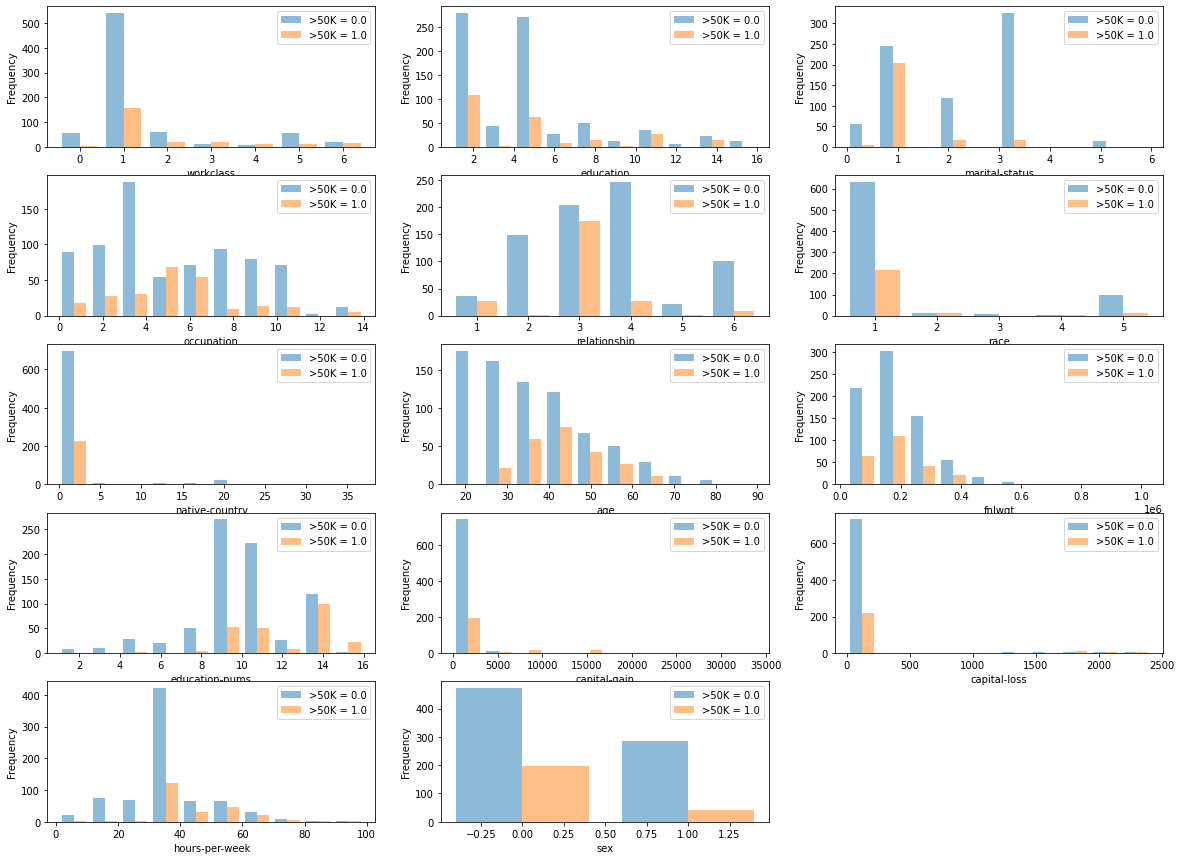

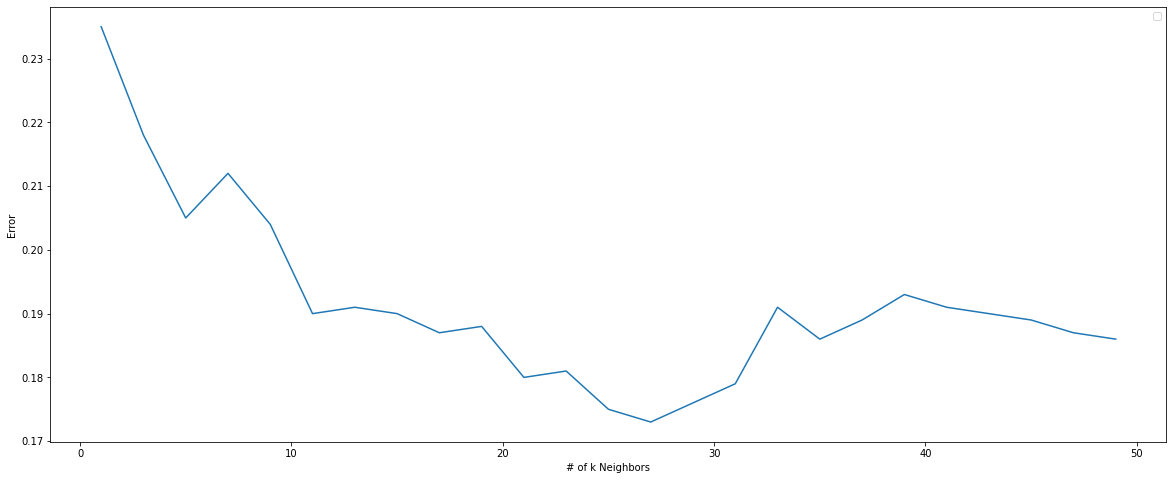

Investigating depths...


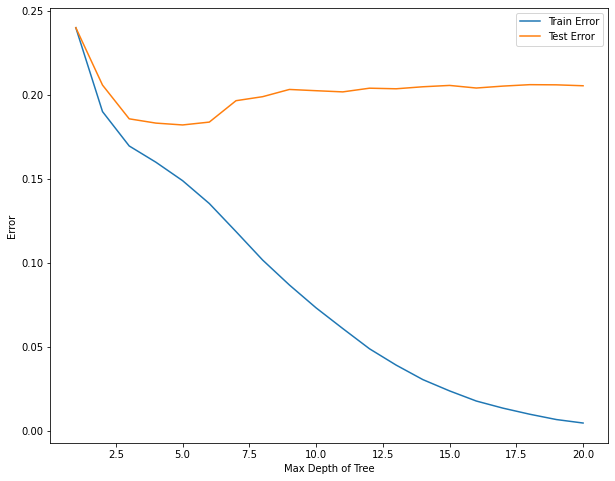

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


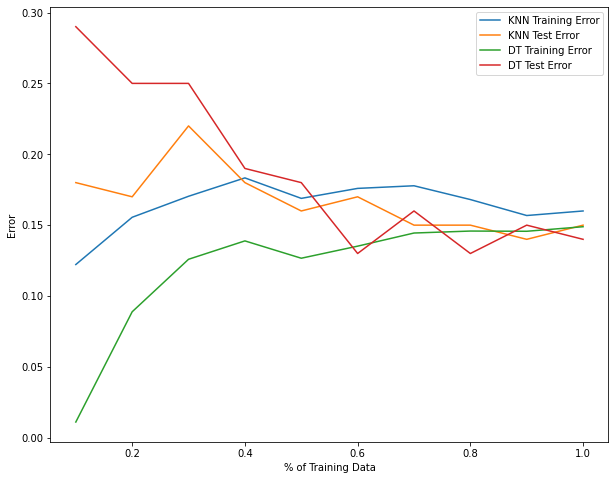

Done


In [30]:

######################################################################
# main
######################################################################

def main():
    
    
    
    # load adult_subsample dataset with correct file path
    ### ========== TODO : START ========== ###
    data_file =  "/content/drive/My Drive/CSM146/HW1/adult_subsample.csv"
    ### ========== TODO : END ========== ###
    



    data = load_data(data_file, header=1, predict_col=-1)

    X = data.X; Xnames = data.Xnames
    y = data.y; yname = data.yname
    n,d = X.shape  # n = number of examples, d =  number of features

    

    plt.figure()
    #========================================
    # part a: plot histograms of each feature
    print('Plotting...')
    plot_histograms (X, y, Xnames=Xnames, yname=yname)
    




    ### ========== TODO : START ========== ###
    # part i: Preprocess X (e.g., normalize)

    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    
    ### ========== TODO : END ========== ###




    #========================================
    # train Majority Vote classifier on data
    print('Classifying using Majority Vote...')
    clf = MajorityVoteClassifier() # create MajorityVote classifier, which includes all model parameters
    clf.fit(X, y)                  # fit training data using the classifier
    y_pred = clf.predict(X)        # take the classifier and run it on the training data
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
    print('\t-- training error: %.3f' % train_error)





    ### ========== TODO : START ========== ###
    # part b: evaluate training error of Random classifier
    print('Classifying using Random...')
    clf = RandomClassifier() # create MajorityVote classifier, which includes all model parameters
    clf.fit(X, y)                  # fit training data using the classifier
    y_pred = clf.predict(X)        # take the classifier and run it on the training data
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
    print('\t-- training error: %.3f' % train_error)

    ### ========== TODO : END ========== ###





    ### ========== TODO : START ========== ###
    # part c: evaluate training error of Decision Tree classifier
    print('Classifying using Decision Tree...')
    clf = DecisionTreeClassifier(criterion="entropy")
    clf.fit(X, y)
    y_pred = clf.predict(X)        # take the classifier and run it on the training data
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
    print('\t-- training error: %.3f' % train_error)

    ### ========== TODO : END ========== ###






    ### ========== TODO : START ========== ###
    # part d: evaluate training error of k-Nearest Neighbors classifier
    # use k = 3, 5, 7 for n_neighbors
    print('Classifying using k-Nearest Neighbors (k = 3)...')
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(X, y)
    y_pred = clf.predict(X)        # take the classifier and run it on the training data
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
    print('\t-- training error: %.3f' % train_error)

    print('Classifying using k-Nearest Neighbors (k = 5)...')
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X, y)
    y_pred = clf.predict(X)        # take the classifier and run it on the training data
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
    print('\t-- training error: %.3f' % train_error)

    print('Classifying using k-Nearest Neighbors (k = 7)...')
    clf = KNeighborsClassifier(n_neighbors=7)
    clf.fit(X, y)
    y_pred = clf.predict(X)        # take the classifier and run it on the training data
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
    print('\t-- training error: %.3f' % train_error)
    
    ### ========== TODO : END ========== ###




    
    ### ========== TODO : START ========== ###
    # part e: use cross-validation to compute average training and test error of classifiers
    print('Investigating various classifiers...')

    
    clf = MajorityVoteClassifier()
    train_error, test_error, f1_score = error(clf, X, y)
    print('\t-- Majority Vote Classifier Training Error: %.3f' % train_error)
    print('\t-- Majority Vote Classifier Test Error: %.3f' % test_error)
    print('\t-- Majority Vote Classifier F1 Score: %.3f' % f1_score)
    print('\n')

    clf = RandomClassifier() 
    train_error, test_error, f1_score = error(clf, X, y)
    print('\t-- Random Classifier Training Error: %.3f' % train_error)
    print('\t-- Random Classifier Test Error: %.3f' % test_error)
    print('\t-- Random Classifier F1 Score: %.3f' % f1_score)
    print('\n')

    clf = DecisionTreeClassifier(criterion="entropy")
    train_error, test_error, f1_score = error(clf, X, y)
    print('\t-- Decision Tree Classifier Training Error: %.3f' % train_error)
    print('\t-- Decision Tree Classifier Test Error: %.3f' % test_error)
    print('\t-- Decision Tree Classifier F1 Score: %.3f' % f1_score)
    print('\n')

    clf = KNeighborsClassifier(n_neighbors=5)
    train_error, test_error, f1_score = error(clf, X, y)
    print('\t-- KNeighbors Classifier Training Error: %.3f' % train_error)
    print('\t-- KNeighbors Classifier Test Error: %.3f' % test_error)
    print('\t-- KNeighbors Classifier F1 Score: %.3f' % f1_score)
    print('\n')
    
    ### ========== TODO : END ========== ###
    
    

    
    ### ========== TODO : START ========== ###
    # part f: use 10-fold cross-validation to find the best value of k for k-Nearest Neighbors classifier
    print('Finding the best k...')
    k_values = []
    cross_val_error = []
    for i in range(1, 51, 2):
      clf = KNeighborsClassifier(n_neighbors=i)
      k_values.append(i)

      cross_val_error.append(1 - np.mean(cross_val_score(clf, X, y, cv=10)))


    plt.figure(figsize=((20,8)))
    plt.plot(k_values, cross_val_error)
    plt.xlabel("# of k Neighbors")
    plt.ylabel("Error")
    plt.legend()
    print(cross_val_error)

    plt.show()
    

    

      

    ### ========== TODO : END ========== ###
    

    
    

    ### ========== TODO : START ========== ###
    # part g: investigate decision tree classifier with various depths
    print('Investigating depths...')
    depths = []
    tree_train_error = []
    tree_test_error = []
    for i in range(1, 21):
      clf = DecisionTreeClassifier(criterion="entropy", max_depth=i)
      depths.append(i)

      tree_train_error_temp, tree_test_error_temp, tree_f1_score_temp = error(clf, X, y, ntrials=100)
      tree_train_error.append(tree_train_error_temp)
      tree_test_error.append(tree_test_error_temp)


    plt.figure(figsize=((10,8)))
    plt.plot(depths, tree_train_error, label="Train Error")
    plt.plot(depths, tree_test_error, label="Test Error")
    plt.xlabel("Max Depth of Tree")
    plt.ylabel("Error")
    plt.legend()
    plt.show()

    


    ### ========== TODO : END ========== ###


    

    
    ### ========== TODO : START ========== ###
    # part h: investigate decision tree and k-Nearest Neighbors classifier with various training set sizes

     
    sss = StratifiedShuffleSplit(test_size=0.1, random_state=0, n_splits=1)
    

    splits = np.arange(0.1, 1.0, 0.1)
    knn_training_error = []
    knn_test_error = []
    decision_tree_training_error = []
    decision_tree_test_error = []

    for train_index, test_index in sss.split(X, y):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      for i in splits:
        ssss = StratifiedShuffleSplit(train_size=i, random_state=0, n_splits=1)
        for train_index_sub, test_index_sub in ssss.split(X_train, y_train):
          X_train_sub = X_train[train_index_sub]
          y_train_sub = y_train[train_index_sub]

          clf = KNeighborsClassifier(n_neighbors=15)
          clf.fit(X_train_sub, y_train_sub)
          #compute training error
          y_pred = clf.predict(X_train_sub)
          knn_training_error.append(1 - metrics.accuracy_score(y_train_sub, y_pred, normalize=True))
          #manually compute test error
          y_pred = clf.predict(X_test)
          knn_test_error.append(1 - metrics.accuracy_score(y_test, y_pred, normalize=True))

          clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
          clf.fit(X_train_sub, y_train_sub)
          #compute training error
          y_pred = clf.predict(X_train_sub)
          decision_tree_training_error.append(1 - metrics.accuracy_score(y_train_sub, y_pred, normalize=True))
          #manually compute test error
          y_pred = clf.predict(X_test)
          decision_tree_test_error.append(1 - metrics.accuracy_score(y_test, y_pred, normalize=True))

      splits = np.append(splits, 1.0)
      print(splits)
      clf = KNeighborsClassifier(n_neighbors=15)
      clf.fit(X_train, y_train)
      #compute training error
      y_pred = clf.predict(X_train)
      knn_training_error.append(1 - metrics.accuracy_score(y_train, y_pred, normalize=True))
      #manually compute test error
      y_pred = clf.predict(X_test)
      knn_test_error.append(1 - metrics.accuracy_score(y_test, y_pred, normalize=True))

      clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
      clf.fit(X_train, y_train)
      #compute training error
      y_pred = clf.predict(X_train)
      decision_tree_training_error.append(1 - metrics.accuracy_score(y_train, y_pred, normalize=True))
      #manually compute test error
      y_pred = clf.predict(X_test)
      decision_tree_test_error.append(1 - metrics.accuracy_score(y_test, y_pred, normalize=True))

    plt.figure(figsize=((10,8)))
    plt.plot(splits, knn_training_error, label="KNN Training Error")
    plt.plot(splits, knn_test_error, label="KNN Test Error")
    plt.plot(splits, decision_tree_training_error, label="DT Training Error")
    plt.plot(splits, decision_tree_test_error, label="DT Test Error")
    plt.xlabel("% of Training Data")
    plt.ylabel("Error")
    plt.legend()
    plt.show()

      


    
    ### ========== TODO : END ========== ###


    print('Done')


if __name__ == "__main__":
    main()
